In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

<H1>Table of contents </h1>

<h1>Import and preprocesing</h1>

In [32]:
df = pd.read_csv('filtered_property_location_clean.csv', delimiter=';')

In [33]:
df_orig = df.drop(columns=['Timestamp', 'LocationId', 'PropertyAdditionalFeaturesId', 'PropertyDescription', 'Vendor', 'Availability','YearBuilt',])


In [34]:
df

,ListingId,Timestamp,Rooms,SquareMeter,Floor,Availability,ObjectType,YearBuilt,Price,AdditionalCost,...,municipality,incometax_canton,incometax_municipality,wealthtax_canton,wealthtax_municipality,population_density,public_transport_count,supermarket_count,foodandbeverage_count,Price_per_m2
0,4000339592,2024-03-26 20:51:38,2.5,93.0,1,Sofort,Wohnung,2020-01-01,1920.0,NaN,...,Mendrisio,97.0,77.00,97.0,77.00,468.0,1,0,0,20.645161
1,4000280848,2024-03-26 20:51:50,2.5,62.0,2,Sofort,Wohnung,2017-01-01,1730.0,280.0,...,Riva San Vitale,97.0,80.00,97.0,80.00,437.0,5,1,3,27.903226
2,4000653378,2024-03-26 21:52:37,2.0,58.0,3,Nach Vereinbarung,Wohnung,NaN,910.0,160.0,...,Morbio Inferiore,97.0,84.00,97.0,84.00,1999.0,6,0,2,15.689655
3,4000381531,2024-03-26 22:44:33,1.5,40.0,NaN,Sofort,Wohnung,NaN,1350.0,100.0,...,Lugano,97.0,77.00,97.0,77.00,825.0,4,0,3,33.750000
4,4000263143,2024-03-26 20:52:41,2.5,50.0,99,Nach Vereinbarung,Wohnung,NaN,1300.0,NaN,...,Bissone,97.0,69.00,97.0,69.00,491.0,1,0,0,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,4000958045,2024-03-29 23:06:02,2.5,52.0,3,02.04.2024,Wohnung,NaN,1770.0,120.0,...,Genève,147.5,45.49,147.5,45.49,12811.0,8,9,97,34.038462
8857,4000950153,2024-03-29 23:06:13,2.5,52.0,3,01.04.2024,Wohnung,NaN,1770.0,120.0,...,Genève,147.5,45.49,147.5,45.49,12811.0,8,8,90,34.038462
8858,4000945810,2024-03-29 23:06:25,5.0,100.0,NaN,01.04.2024,Reihenfamilienhaus,NaN,3950.0,NaN,...,Confignon,147.5,47.00,147.5,47.00,1672.0,4,1,2,39.500000
8859,4000944563,2024-03-29 23:07:10,1.5,40.0,5,01.04.2024,Wohnung,NaN,1540.0,90.0,...,Genève,147.5,45.49,147.5,45.49,12811.0,9,7,84,38.500000


In [35]:
# one Hot encode wbauj
# Filter out None values from 'rooms' attribute
ObjectType_list = [ObjectType for ObjectType in df['ObjectType'] if ObjectType is not None]

# Extract unique values
ObjectType_list = list(set(ObjectType_list))
ObjectType_list

# Create new attributes for each unique value
for item in ObjectType_list:
    df[item] = df['ObjectType'].apply(lambda x: 1 if x == item else 0)


# Convert columns as string
df.columns = ['y' + str(col) if isinstance(col, int) else col for col in df.columns]

In [36]:
# one Hot encode wbauj
# Filter out None values from 'rooms' attribute
Canton_list = [Canton for Canton in df['Canton'] if Canton is not None]

# Extract unique values
Canton_list = list(set(Canton_list))
Canton_list

# Create new attributes for each unique value
for item in Canton_list:
    df[item] = df['Canton'].apply(lambda x: 1 if x == item else 0)


# Convert columns as string
df.columns = ['y' + str(col) if isinstance(col, int) else col for col in df.columns]

In [37]:
from scipy.stats import zscore
# Berechne den Z-Score der `Price`-Spalte
df['z_score_price'] = zscore(df['Price'])

# Filtere Daten, um nur jene zu behalten, deren absolute Z-Scores kleiner als 3 sind
df = df[(df['z_score_price'].abs() < 3)]

# Optional: entferne die Z-Score-Spalte, falls sie nicht mehr benötigt wird
df = df.drop(columns=['z_score_price'])

In [38]:
#df['YearBuilt']

In [39]:
# Process the 'Yearbuilt' column
#df['YearBuilt'] = df['YearBuilt'].str.split('-').str[0]  # Split and keep the first part
#df['YearBuilt'] = df['YearBuilt'].fillna(0)               # Replace NaN values with 0
#df['YearBuilt'] = df['YearBuilt'].astype(int) 

In [40]:
# Replace all NaN values with an empty string
df.fillna(0, inplace=True)

In [41]:
df.columns

Index(['ListingId', 'Timestamp', 'Rooms', 'SquareMeter', 'Floor',
       'Availability', 'ObjectType', 'YearBuilt', 'Price', 'AdditionalCost',
       'NetPrice', 'LocationId', 'PropertyAdditionalFeaturesId',
       'PropertyDescription', 'Vendor', 'Canton', 'street', 'zip', 'longitude',
       'latitude', 'bfs_number', 'municipality', 'incometax_canton',
       'incometax_municipality', 'wealthtax_canton', 'wealthtax_municipality',
       'population_density', 'public_transport_count', 'supermarket_count',
       'foodandbeverage_count', 'Price_per_m2', 'Mehrfamilienhaus',
       'Einfamilienhaus', 'Chalet', 'Mansarde', 'Studio', 'Einliegerwohnung',
       'Villa', 'Wohnung', 'Hobbyraum', 'Maisonette / Duplex', 'Dachwohnung',
       'Doppeleinfamilienhaus', 'Loft', 'Kellerabteil', 'Reihenfamilienhaus',
       'Terrassenwohnung', 'Attikawohnung', 'Bauernhaus', 'Terrassenhaus',
       'Einzelzimmer', 'be', 'tg', 'ar', 'bl', 'ge', 'ow', 'vd', 'bs', 'zh',
       'nw', 'ne', 'lu', 'so', 'ti

In [42]:
df.to_clipboard()

In [43]:
# Function to replace 'EG' with 0
def replace_eg(value):
    if 'EG' in str(value):
        return 0
    else:
        return value

# Apply the function to the 'Floor' column
df['Floor'] = df['Floor'].apply(replace_eg)

Mean Squared Error: 305033.88694321417
R^2 Score: 0.5981955593084558


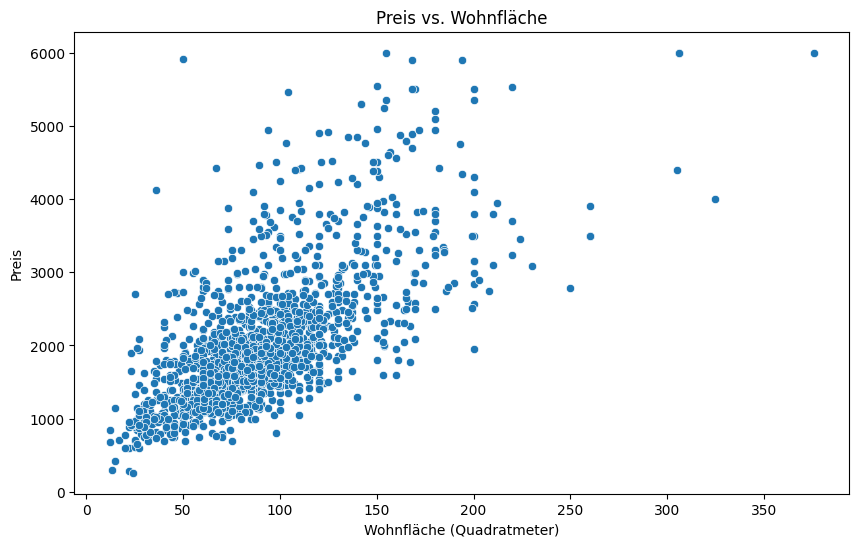

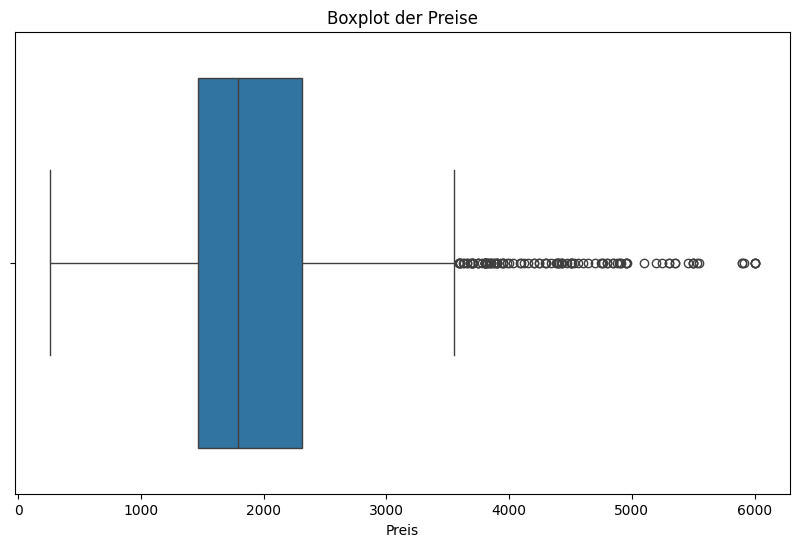

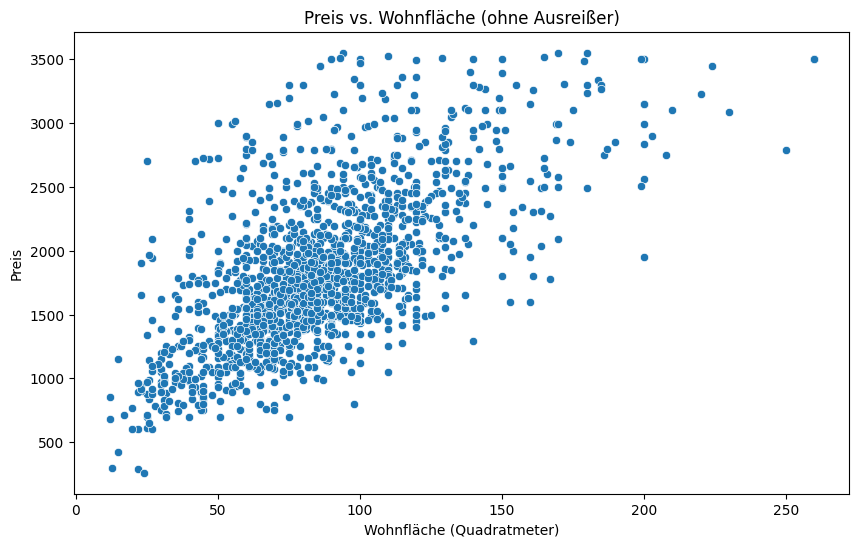

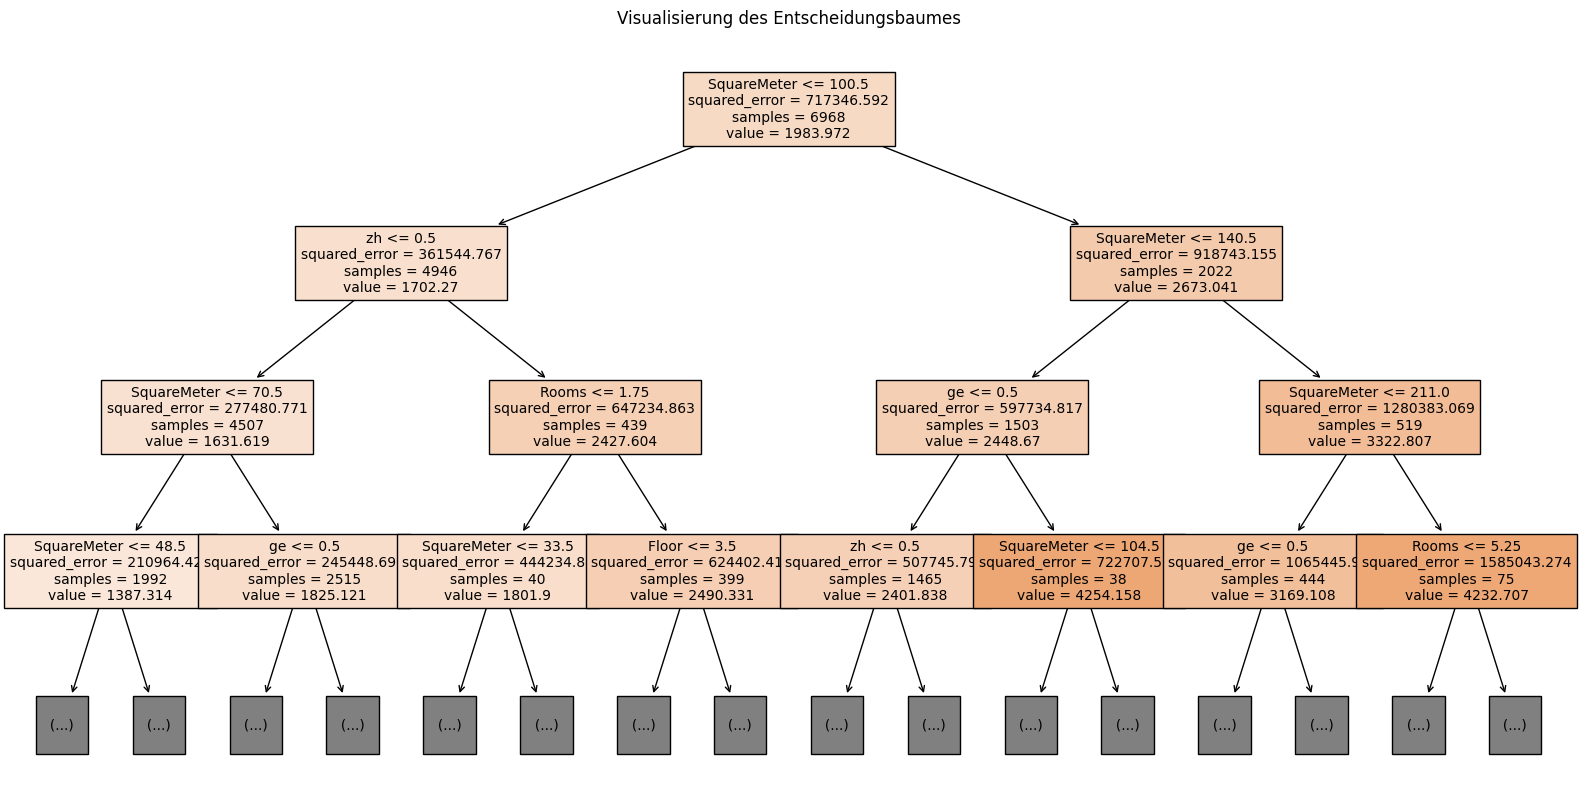

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

# Assuming 'df' is your original DataFrame and it's already been loaded with the data
data = df.copy()

# Define columns and target
columns_x = ['Rooms',
                 'SquareMeter',                 'Floor',
        'AdditionalCost',
            'Terrassenwohnung',        
                    'Mansarde',   'Maisonette / Duplex',
               'Terrassenhaus',                  'Loft',
                 'Dachwohnung',      'Mehrfamilienhaus',
             'Einfamilienhaus',                'Studio',
                       'Villa',    'Reihenfamilienhaus',
                     'Wohnung',         'Attikawohnung',
                   'Hobbyraum',
            'Einliegerwohnung',          'Einzelzimmer',
                      'Chalet',            'Bauernhaus',
                'Kellerabteil', 'Doppeleinfamilienhaus',
                          'bs',                    'sg',
                          'ne',                    'bl',
                          'vd',                    'gl',
                          'sh',                    'ju',
                          'ti',                    'sz',
                          'zh',                    'ur',
                          'gr',                    'vs',
                          'lu',                    'be',
                          'ai',                    'ar',
                          'ge',                    'fr',
                          'so',                    'tg',
                          'zg',                    'nw',
                          'ow',                    'ag']
X = data[columns_x]
y = data['Price']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Add predictions back to the test DataFrame
X_test['predicted_price'] = y_pred

# Optionally, create a comprehensive DataFrame with original index
results_df = X_test.join(data['Price'], how='left')
results_df.rename(columns={'price': 'actual_price'}, inplace=True)

# Display the results
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
results_df  # Show the first few rows of the results DataFrame


# Berechne den Z-Score der `Price`-Spalte
results_df['z_score_price'] = zscore(results_df['Price'])

# Filtere Daten, um nur jene zu behalten, deren absolute Z-Scores kleiner als 3 sind
filtered_df = results_df[(results_df['z_score_price'].abs() < 3)]

# Optional: entferne die Z-Score-Spalte, falls sie nicht mehr benötigt wird
filtered_df = filtered_df.drop(columns=['z_score_price'])


# Scatter Plot für Preis vs. Wohnfläche
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareMeter', y='Price', data=results_df)
plt.title('Preis vs. Wohnfläche')
plt.xlabel('Wohnfläche (Quadratmeter)')
plt.ylabel('Preis')
plt.show()

# Boxplot für Preise, um Ausreißer zu identifizieren
plt.figure(figsize=(10, 6))
sns.boxplot(x=results_df['Price'])
plt.title('Boxplot der Preise')
plt.xlabel('Preis')
plt.show()

# Optional: Entfernen von Ausreißern, wenn erforderlich
# Definition einer Methode, um Ausreißer zu entfernen, basierend auf dem IQR
Q1 = results_df['Price'].quantile(0.25)
Q3 = results_df['Price'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = results_df.query('(@Q1 - 1.5 * @IQR) <= Price <= (@Q3 + 1.5 * @IQR)')

# Wiederholung des Scatterplots mit gefilterten Daten
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareMeter', y='Price', data=filtered_df)
plt.title('Preis vs. Wohnfläche (ohne Ausreißer)')
plt.xlabel('Wohnfläche (Quadratmeter)')
plt.ylabel('Preis')
plt.show()

# Angenommen, tree_reg ist dein trainierter DecisionTreeRegressor
plt.figure(figsize=(20,10))
plot_tree(tree_reg, feature_names=columns_x, filled=True, max_depth=3, fontsize=10)
plt.title('Visualisierung des Entscheidungsbaumes')
plt.show()



# Chatgpt fragen das er mir aufzeigen soll welche Feature mehr gewichtung haben als andere.
# Mit Forschleife mehrere Modelle erstellen und damit aufzeigen ob es unterschiede gibt.




In [45]:
import ipywidgets as widgets
from IPython.display import display
from joblib import load
import joblib
from sklearn.tree import DecisionTreeRegressor


# Globale Variable zur Speicherung der Ergebnisse
results_df = pd.DataFrame(columns=['Rooms', 'SquareMeter', 'Floor', 'AdditionalCost', 'PredictedPrice'] + Canton_list + ObjectType_list)

# Widgets zur Dateneingabe erstellen
rooms = widgets.FloatText(value=3.0, description='Rooms:')
square_meter = widgets.FloatText(value=120.0, description='Square Meter:')
floor = widgets.IntText(value=2, description='Floor:')
additional_cost = widgets.FloatText(value=150.0, description='Additional Cost:')
canton = widgets.Dropdown(
    options= Canton_list,
    value= None,
    description='Canton:'
)
residence = widgets.Dropdown(
    options= ObjectType_list,
    value = None,
    description='Residence'
)

predict_btn = widgets.Button(description="Predict Price")
price_output = widgets.Label()

def on_predict_clicked(b):
    # Angenommene Liste von Kantonen, die im Trainingsdatensatz verwendet wurden
    expected_cantons = Canton_list
    # Generieren der Kantons-Eingaben
    canton_input = [1 if canton.value == c else 0 for c in expected_cantons]  
    # Residence
    expected_residence = ObjectType_list
    #Generiere der Residence-Eingaben
    residence_input = [1 if residence.value == c else 0 for c in expected_residence] 


    # Create new attributes for each unique value
    for item in ObjectType_list:
        df[item] = df['ObjectType'].apply(lambda x: 1 if x == item else 0)
    
    # Erstelle den vollständigen Feature-Vektor
    feature_input = [rooms.value, square_meter.value, floor.value, additional_cost.value] + canton_input + residence_input
    feature_input = feature_input[:50]  # Begrenze die Anzahl der Features auf 50, falls notwendig
    
    print(feature_input)
     # Vorhersage durchführen
    predicted_price = tree_reg.predict([feature_input])
    price_output.value = f'Predicted Price: {predicted_price[0]}'

predict_btn.on_click(on_predict_clicked)


def preprosition():
    for item in Canton_list:
        df[item] = df['Canton'].apply(lambda x: 1 if x == item else 0)
    # Convert columns as string
    df.columns = ['y' + str(col) if isinstance(col, int) else col for col in df.columns]


# Anzeigen der Widgets
input_widgets = widgets.VBox([rooms, square_meter, floor, additional_cost, canton, predict_btn])
display(input_widgets, price_output)

Label(value='')

[3.0, 120.0, 2, 150.0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/Users/elras/anaconda3/envs/adsenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [46]:
print(ObjectType_list)
print(Canton_list)

['Mehrfamilienhaus', 'Einfamilienhaus', 'Chalet', 'Mansarde', 'Studio', 'Einliegerwohnung', 'Villa', 'Wohnung', 'Hobbyraum', 'Maisonette / Duplex', 'Dachwohnung', 'Doppeleinfamilienhaus', 'Loft', 'Kellerabteil', 'Reihenfamilienhaus', 'Terrassenwohnung', 'Attikawohnung', 'Bauernhaus', 'Terrassenhaus', 'Einzelzimmer']
['be', 'tg', 'ar', 'bl', 'ge', 'ow', 'vd', 'bs', 'zh', 'nw', 'ne', 'lu', 'so', 'ti', 'gl', 'ag', 'gr', 'zg', 'fr', 'vs', 'sz', 'ju', 'sh', 'sg', 'ur', 'ai']
